# Install and import dependencies

In [24]:
%%capture
!git clone https://github.com/fionnfuchs/nolama-trading-bot

import sys
sys.path.append('/content/nolama-trading-bot/nolama')
sys.path.append('/content/nolama-trading-bot')

!pip install alpaca-trade-api
!pip install nest_asyncio
!pip install ta
!pip install Historic-Crypto

In [25]:
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import TimeFrame
import nest_asyncio

from Historic_Crypto import HistoricalData

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.patches import Ellipse

from steps import BollingerBandsCalculation, BollingerBandsScoring
from bot import Bot

nest_asyncio.apply()

# Get historical Bitcoin data and run the bot

In [29]:
bot = Bot("BTC", None)
bot.calculation_steps.append(BollingerBandsCalculation(window=30, window_dev=2))
bot.scoring_steps.append(BollingerBandsScoring())

data = HistoricalData('BTC-USD',60,'2021-04-10-00-00','2021-04-15-00-00').retrieve_data()

close = data["close"].to_list()

def run_test():
  for i in range (len(close)-1):
    bot.tick(close[i], i)

  holding_comparison = close[len(close)-1] - close[0]
  print("Profit of the bot: " + str(bot.performance))
  print("Profit when just holding for comparison: " + str(holding_comparison))

run_test()

Checking input parameters are in the correct format...
Formatting Dates...
Checking if ticker supplied is available on the CoinBase Pro API...
Connected to the CoinBase Pro API...
Ticker 'BTC-USD' found at the CoinBase Pro API, continuing to extraction...
Data for chunk 0 of 24 extracted
Data for chunk 1 of 24 extracted
Data for chunk 2 of 24 extracted
Data for chunk 3 of 24 extracted
Data for chunk 4 of 24 extracted
Data for chunk 5 of 24 extracted
Data for chunk 6 of 24 extracted
Data for chunk 7 of 24 extracted
Data for chunk 8 of 24 extracted
Data for chunk 9 of 24 extracted
Data for chunk 10 of 24 extracted
Data for chunk 11 of 24 extracted
Data for chunk 12 of 24 extracted
Data for chunk 13 of 24 extracted
Data for chunk 14 of 24 extracted
Data for chunk 15 of 24 extracted
Data for chunk 16 of 24 extracted
Data for chunk 17 of 24 extracted
Data for chunk 18 of 24 extracted
Data for chunk 19 of 24 extracted
Data for chunk 20 of 24 extracted
Data for chunk 21 of 24 extracted
Data f

# Plot the bots behaviour

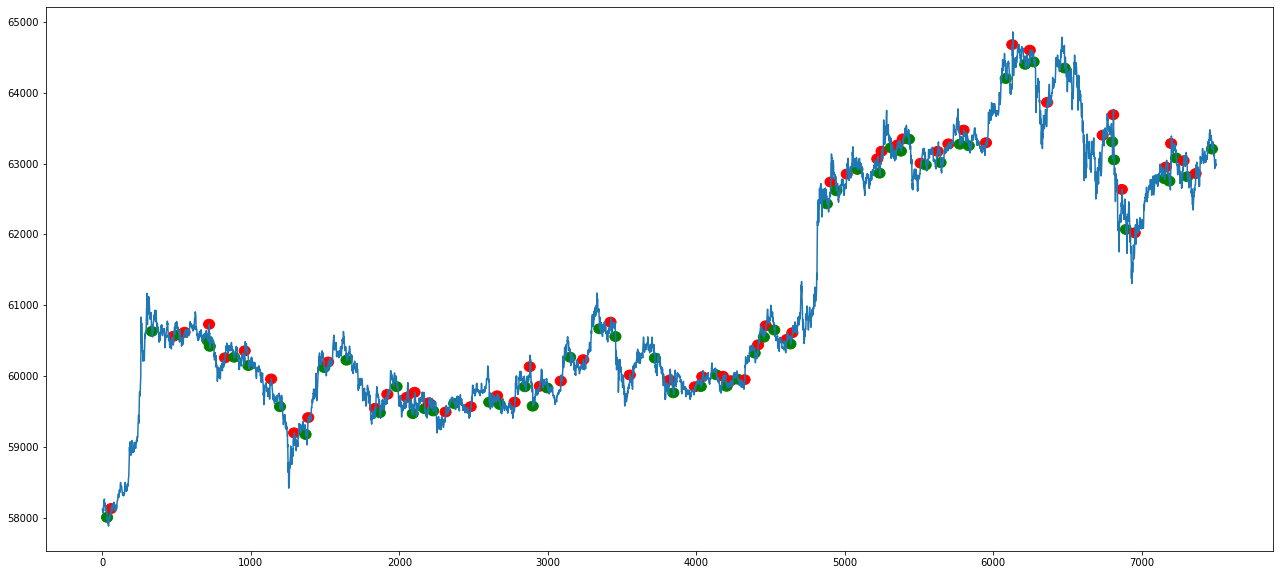

In [30]:
# Plot trades
# Green circles = buy, red circles = sell

trades = bot.trades

fig, ax = plt.subplots(figsize=(22,10))

ar = len(close) / (max(close)-min(close))
circle_radius = len(close)/100

for t in trades:
  color = "g"
  if t["type"] == "buy":
    color = "g"
  else:
    color = "r"
  circle = Ellipse((t["index"], t["price"]), width=circle_radius, height=circle_radius/ar*2, color=color)
  ax.add_patch(circle)

ax.plot(range(len(close)), close)